# Class 03: Hierarchical Clustering: Linkage Methods and Dendrograms

**Author**: Mohammed A. Shehab

**Purpose**: This notebook demonstrates hierarchical clustering using different linkage methods and explains how to determine the number of clusters from a dendrogram.

---

## Section 1: Linkage Methods and Dendrograms
### Explanation of Linkage Methods
1. Single Linkage (Minimum Distance):
- Merges clusters based on the shortest distance between their points.
- Tends to form long, elongated clusters ("chaining effect").
2. Complete Linkage (Maximum Distance):
- Merges clusters based on the farthest distance between their points.
- Produces compact, spherical clusters but is sensitive to outliers.
3. Average Linkage:
- Merges clusters based on the average distance between all points in two clusters.
- Balances compactness and chaining effects.


### Visualizing Dendrograms

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

data = np.array([
    [1, 2], [2, 2], [5, 5], [6, 6], [7, 7],
    [3, 4], [4, 4], [8, 8], [9, 9], [10, 10]
])

# Linkage methods to compare
linkage_methods = ['single', 'complete', 'average']

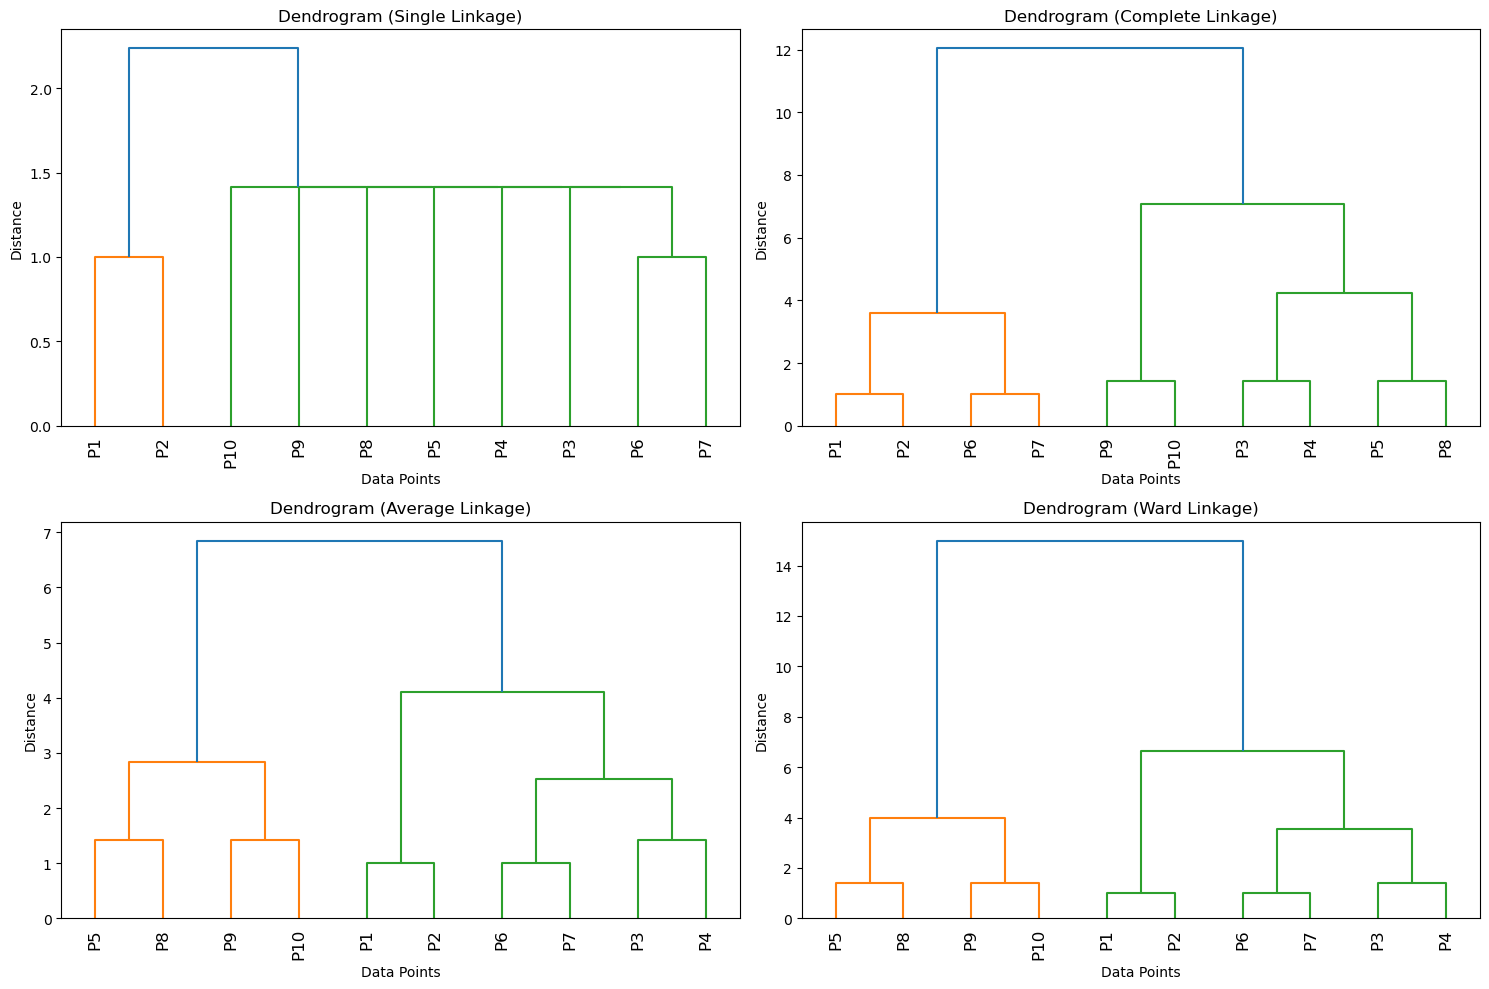

In [9]:
# Plot Dendrograms for Different Linkage Methods
plt.figure(figsize=(15, 10))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    Z = linkage(data, method=method)  # Compute the linkage matrix
    dendrogram(Z, labels=[f'P{i+1}' for i in range(len(data))], leaf_rotation=90)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
plt.tight_layout()
plt.show()

## Section 2: Determining the Number of Clusters

### Explanation
The number of clusters can be determined by **cutting the dendrogram** at a specific height (distance threshold). The clusters below the cut are considered separate.

### Dendrogram with a Threshold

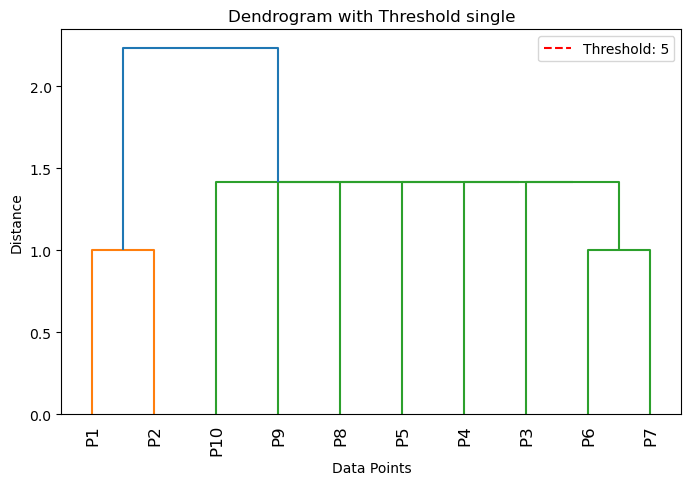

Cluster Assignments: [1 1 1 1 1 1 1 1 1 1]


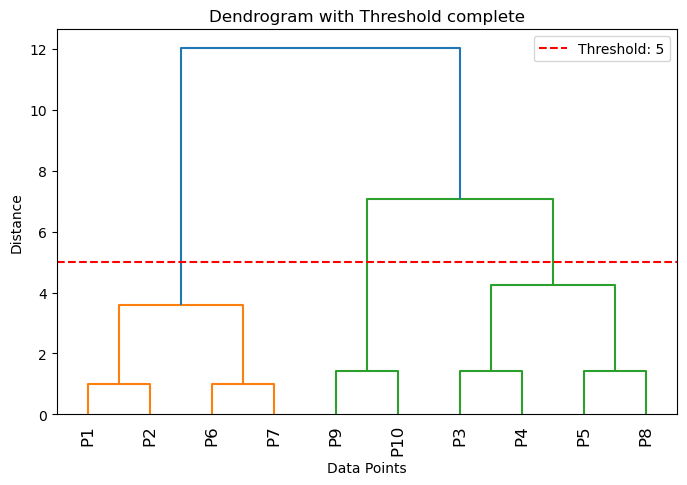

Cluster Assignments: [1 1 3 3 3 1 1 3 2 2]


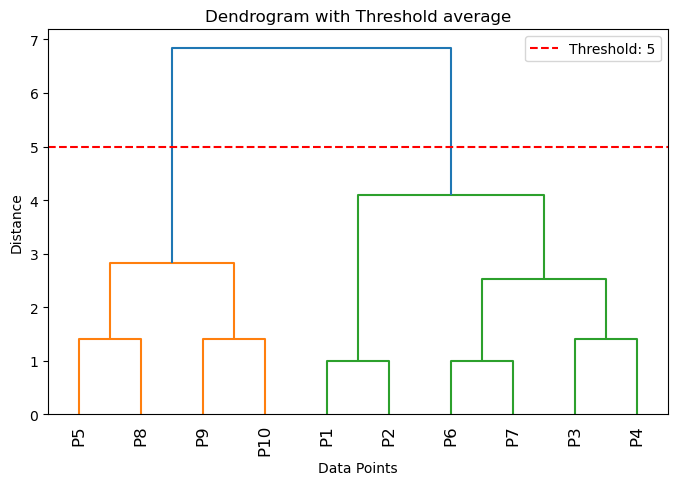

Cluster Assignments: [2 2 2 2 1 2 2 1 1 1]


In [18]:
# Select one linkage method (e.g., 'ward') for further analysis
for m in linkage_methods:
    Z = linkage(data, method=m)  # Change to 'single', 'complete', or 'average' for comparison
    
    # Plot Dendrogram with a Threshold Line
    plt.figure(figsize=(8, 5))
    dendrogram(Z, labels=[f'P{i+1}' for i in range(len(data))], leaf_rotation=90)
    plt.axhline(y=5, color='r', linestyle='--', label='Threshold: 5')
    plt.title(f"Dendrogram with Threshold {m}")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.legend()
    plt.show()
    
    # Extract clusters based on the threshold distance
    from scipy.cluster.hierarchy import fcluster
    
    threshold_distance = 5  # Set the cutoff distance
    clusters = fcluster(Z, t=threshold_distance, criterion='distance')
    
    # Print the cluster assignments
    print("Cluster Assignments:", clusters)

## Next Steps
### You can:

* Experiment with different datasets.
* Adjust the threshold in the dendrogram to explore different numbers of clusters.
* Apply hierarchical clustering to real-world data.
